#**Deep Learning Homework 3: Convolutional Neural Networks**
---
In this homework, we will explore how to develop a simple Convolutional Neural Network for image classification. We will use the CIFAR-10 dataset. In the first part, we will learn how to develop a simple CNN, while in the second part we will explore the impact of various hyper-parameters in the learning performances.

##Exercise 3.1: Simple CNN

Let's start by importing Tensorflow, Keras and Numpy

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)

###Load dataset:
### Load Data: CIFAR-10 dataset


We will use the CIFAR-10 dataset.The dataset consists of 60000 images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. Each sample is a 32x32 pixels color image, associated with a label from 10 classes:

```
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
```

Each pixel intensity is represented by a `uint8` (byte) from 0 to 255.
We will divide the dataset in training, testing and validation set. As you already know, the training set will be used to train the model, the validation set will be used to perform model selection and finally, the test set will be used to asses the performance of deep network.

Since we will use a [2DConv](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) we have to provide also a new dimension of the input that represents the number of channels (that in grey scale image is just one and in color images is 3). Therefore, if you are using grayscale images use [tf.expand_dims](https://www.tensorflow.org/api_docs/python/tf/expand_dims#:~:text=Used%20in%20the%20notebooks,-Used%20in%20the&text=This%20operation%20is%20useful%20to,to%20a%20tensor%20of%20scalars) to transform each image from a matrix to a 3-dimensional tensor. Finally, we have to normalize the input data.

In [2]:
cifar_10 = keras.datasets.cifar10
(X_train_full, y_train_full), (X_test, y_test) = (
    cifar_10.load_data()) # The dataset is already divede in test and training

# We extract the first 5000 samples of the training set, to use them as the validation set
X_valid, X_train = X_train_full[:5000], X_train_full[5000:] 
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]


170508288/170498071 [==============================] - 2s 0us/step


Let's take a look at a sample of the images in the dataset:

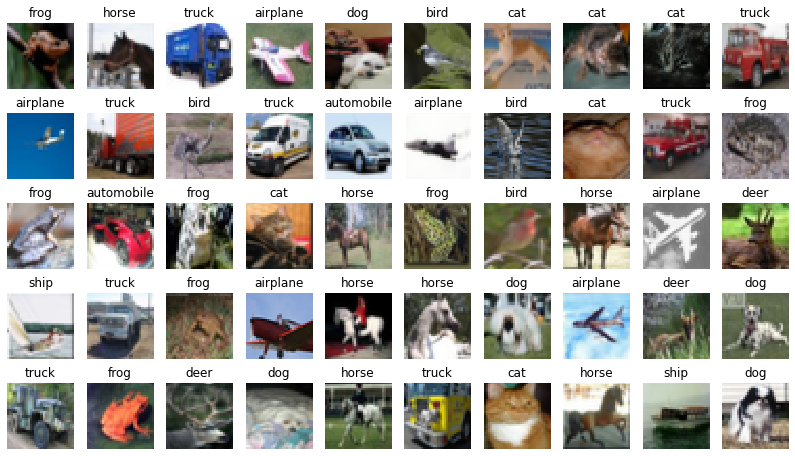

In [3]:
n_rows = 5
n_cols = 10
plt.figure(figsize=(n_cols * 1.4, n_rows * 1.6))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index][0]])
plt.show()

### Input Normalization:

When using Gradient Descent, it is usually a good idea to ensure that all the features have a similar scale. In the following we standardize the pixel values.

In [4]:
# We want to define X_train_scaled, X_valid_scaled and X_test_scaled, by
# standard-scaling X_train, X_valid and X_test.
# For each feature (pixel intensity), we must subtract the mean() of that 
# feature (across all instances, so we use axis=0) and divide by its standard 
# deviation (std(), again axis=0)

means = np.mean(X_train,axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train-means)/std
X_valid = (X_valid-means)/std
X_test = (X_test-means)/std


# Add one dimension to manage the channel if you are using grayscale images.
#X_train=tf.expand_dims(X_train, 3) 
#X_valid=tf.expand_dims(X_valid, 3) 
#X_test=tf.expand_dims(X_test,3)

# Make sure you compute the means and standard deviations on the training set,
# and use these statistics to scale the training set, the validation set and the
# test set

###Define the model

Let's create a simple CNN. The model will be composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 ([MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D))
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function to ensure that the sum of all the estimated class probabilities for each image is equal to 1.
Note that as 'input_shape' attribute's value in the first layer report also the third dimension that represents the channel.

In [5]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], padding="same", activation="relu", input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])


Print the model summary

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 10)                81930     
                                                                 
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


Note that the number of parameters mostly depends on the output layers, indeed the parameter sharing techinique used by the 2D convolutional layers allows to significantly reduce the number of learnable weights.
Now we can train the model.

In [7]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
352/352 [==============================] - 29s 81ms/step - loss: 1.4793 - accuracy: 0.4797 - val_loss: 1.2944 - val_accuracy: 0.5508
Epoch 2/10
352/352 [==============================] - 30s 84ms/step - loss: 1.1874 - accuracy: 0.5886 - val_loss: 1.1465 - val_accuracy: 0.6078
Epoch 3/10
352/352 [==============================] - 28s 79ms/step - loss: 1.0577 - accuracy: 0.6369 - val_loss: 1.0886 - val_accuracy: 0.6268
Epoch 4/10
352/352 [==============================] - 28s 79ms/step - loss: 0.9793 - accuracy: 0.6608 - val_loss: 1.0511 - val_accuracy: 0.6378
Epoch 5/10
352/352 [==============================] - 28s 79ms/step - loss: 0.9237 - accuracy: 0.6840 - val_loss: 1.0463 - val_accuracy: 0.6456
Epoch 6/10
352/352 [==============================] - 28s 79ms/step - loss: 0.8796 - accuracy: 0.6998 - val_loss: 1.0384 - val_accuracy: 0.6490
Epoch 7/10
352/352 [==============================] - 28s 79ms/step - loss: 0.8452 - accuracy: 0.7113 - val_loss: 1.0225 - val_accuracy:

Plot the loss and the accuracy trends for the training and validation set. Then, compute the result on the test set.

313/313 - 3s - loss: 1.0416 - accuracy: 0.6470 - 3s/epoch - 8ms/step
accuracy: 64.70%


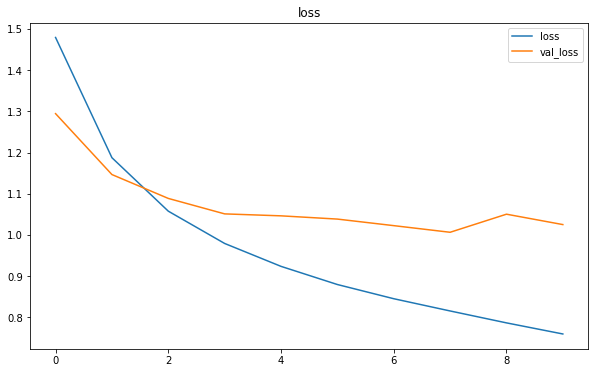

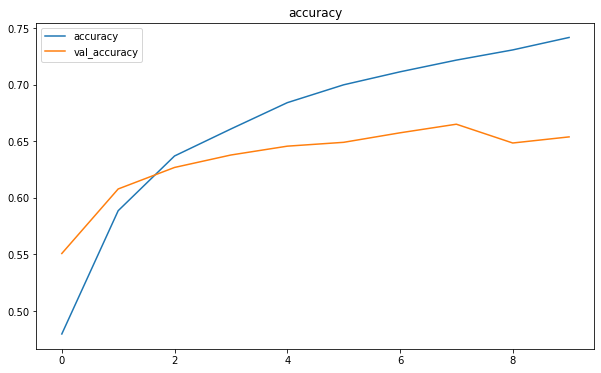

In [8]:
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'], label='loss')
  plt.plot(history.epoch,history.history['val_loss'],label='val_loss')
  plt.title('loss')
  plt.legend()
  
def plot_accuracy(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['accuracy'],label='accuracy')
  plt.plot(history.epoch,history.history['val_accuracy'],label='val_accuracy')
  plt.title('accuracy')
  plt.legend()
  
plot_loss(history)

plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))



###Visualize Weights

An interesting thing to do is to visualize the learned weights for the convolutional layer. We have 32 kernels of size 3x3, we can just plot them as images, mapping the weight values to grayscale.

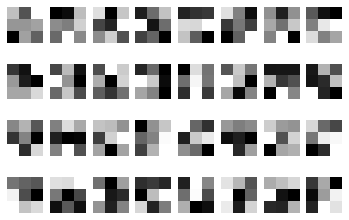

In [9]:
# Weights for the first convolutional layer
w0=model.get_weights()[0][:,:,0,:]

# Normalize to range 0.0 - 1.0
w0-=np.min(w0)
w0/=np.max(w0)

for r in range(4):
    for c in range(8):
        n=r*8+c
        plt.subplot(4, 8, n+1)
        plt.imshow(w0[:,:,n], interpolation='none')
        plt.axis('off')
        plt.gray()
plt.show()

They might be a bit hard to interpret, but it seems that the various filters have learned to detect various corners and edges.

### Deep CNN
Let's consider a deeper model, more precily in this exercise we consider a model composed of:
* One 2D convolutional layer with kernel size 3x3 and 32 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2 
* One 2D convolutional layer with kernel size 2x2 and 16 output filters/features, that use ReLu activation function
* a Max Pooling layer (2D) of size 2x2
* a Flatten layer
* a final Dense layer with 10 output neurons (one per class), and with the "softmax" activation function


In [10]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
  
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        2064      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

We see the number of parameters on the two Conv. layers to be quite different.
We therefore ask ourselves:

1.   How the number of parameters on each of the two Conv2D layers is determined?
2.   Why the two considered convolutional layers have a different number of parameters?

Answers:


1. The number of parameters in a convolutional layer is given by:
\begin{align}
 \#(parameters) = ((dimension\, of\, kernel) \times \#(channels\, previous\, layer) + 1) \times \#(channels\, in\, convolutional\, layer)      
\end{align}
where the $+1$ is due to the bias term.

In our case:
* First conv layer: $((3\times3\times3)+1)\times32 = 896$
* Second conv layer: $((2\times2\times32)+1)\times16 = 2064$


2. The number of paramaters is different since in the second conv. layer the dimension of the kernel is smaller (from 9 to 4), the number of filters is smaller (from 32 to 16), and the number of channels in the previous layer is greater (from 3 to 32).\
In fact the previous layer has now 32 channels whereas the input image given to the first conv. layer has just 3 of them (the RGB channels). This results in an increased number of parameters, according to the formula given above.\
Note that the pooling layer doesn't affect the number of parameters since the latter is not correlated to the dimension of the image given in input to the layer.

Let's now train our deep CNN.

Epoch 1/10
352/352 [==============================] - 31s 87ms/step - loss: 1.6177 - accuracy: 0.4249 - val_loss: 1.3642 - val_accuracy: 0.5248
Epoch 2/10
352/352 [==============================] - 30s 84ms/step - loss: 1.2650 - accuracy: 0.5564 - val_loss: 1.1748 - val_accuracy: 0.5938
Epoch 3/10
352/352 [==============================] - 30s 85ms/step - loss: 1.1550 - accuracy: 0.5976 - val_loss: 1.0921 - val_accuracy: 0.6216
Epoch 4/10
352/352 [==============================] - 30s 85ms/step - loss: 1.0819 - accuracy: 0.6264 - val_loss: 1.0602 - val_accuracy: 0.6330
Epoch 5/10
352/352 [==============================] - 30s 86ms/step - loss: 1.0363 - accuracy: 0.6413 - val_loss: 1.0322 - val_accuracy: 0.6406
Epoch 6/10
352/352 [==============================] - 30s 86ms/step - loss: 0.9987 - accuracy: 0.6560 - val_loss: 1.0088 - val_accuracy: 0.6568
Epoch 7/10
352/352 [==============================] - 30s 86ms/step - loss: 0.9763 - accuracy: 0.6629 - val_loss: 1.0046 - val_accuracy:

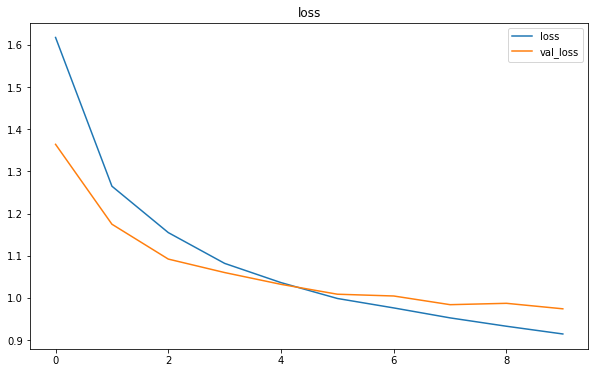

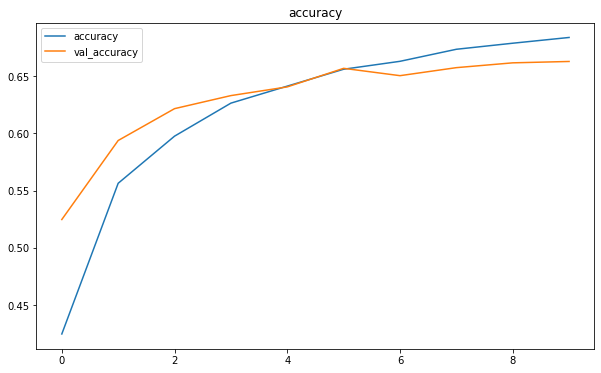

In [11]:
history = model.fit(X_train, y_train, epochs=10, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

## Exercise 3.2: Develop a better CNN
Let's develop a network that performs better than the very simple one above. This exercise aims to explore how much the various hyper-parameters influence the classification capability of the model. 

Our goal now is to modify some of the hyper-parameters of the previous exercise's network and compare the results.
In the cell below we report only the code of the **best model** that we could find. In addtion, we print out its result on the test set, and we plot the accuracy and the loss trends in the notebook you return.
Regardless, for each setup we tested, we analyzed and discussed the obtained results briefly in the last cells at the bottom.

In our tests each reparameterization changed a different aspect in the network, while the rest of the parameters stayed the same. 
Examples of parameters we changed are:

*   number of layers or neurons or filters dimension;
*   activation functions;
*   epochs;
*   batch sizes;
*   optimizer;
*   max-pooling on/off on certain layers, or pool size.

Notice that changing the final layer's softmax activation plus the categorical_crossentropy loss requires some consideration. In fact, problems may arise regarding the domain of the involved functions.

In [12]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=32, kernel_size=[2,2], activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])


model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 5, 5, 32)          4128      
                                                                 
 flatten_2 (Flatten)         (None, 800)              

Epoch 1/30
352/352 [==============================] - 39s 111ms/step - loss: 1.5987 - accuracy: 0.4239 - val_loss: 1.4200 - val_accuracy: 0.5014
Epoch 2/30
352/352 [==============================] - 40s 113ms/step - loss: 1.2725 - accuracy: 0.5510 - val_loss: 1.1867 - val_accuracy: 0.5824
Epoch 3/30
352/352 [==============================] - 39s 110ms/step - loss: 1.1330 - accuracy: 0.6038 - val_loss: 1.1128 - val_accuracy: 0.6106
Epoch 4/30
352/352 [==============================] - 39s 111ms/step - loss: 1.0521 - accuracy: 0.6344 - val_loss: 1.0221 - val_accuracy: 0.6438
Epoch 5/30
352/352 [==============================] - 40s 114ms/step - loss: 0.9919 - accuracy: 0.6554 - val_loss: 1.0111 - val_accuracy: 0.6600
Epoch 6/30
352/352 [==============================] - 39s 111ms/step - loss: 0.9343 - accuracy: 0.6758 - val_loss: 1.0181 - val_accuracy: 0.6528
Epoch 7/30
352/352 [==============================] - 40s 114ms/step - loss: 0.8934 - accuracy: 0.6927 - val_loss: 0.9630 - val_ac

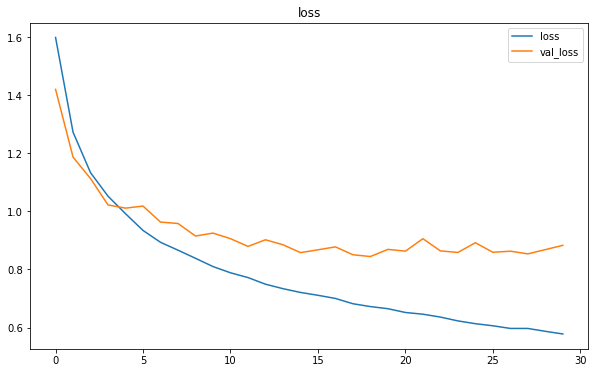

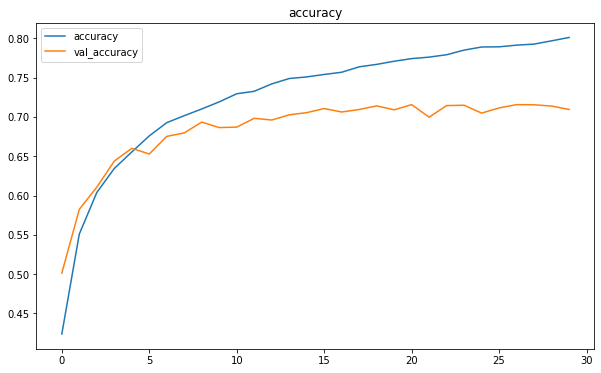

In [13]:
history = model.fit(X_train, y_train, epochs=30, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")

### Tests discussion
The best model we found consists of 3 convolutional layer with different kernel sizes but same number of filters (32) and same activation function (relu).\
These 3 convolutional layers are separated by to 2 MaxPool layers of pool_size = [2, 2].\
Then we have a flattening layer and the final output layer with 10 neurons and activation function softmax.

The achieved accuracy in the test set is 71.51%.

We notice a relatively good improvement w.r.t. the previous model, almost 5% more in accuracy on the test set. We also tested this model with different settings, obtaining the following accuracy scores: (BS ~ Batch Size)

* 70.12% (BS = 128, EarlyStopping patience = 3)
* 70.67% (BS = 70)
* 69.08% (BS = 300)
* 70.63% (BS = 50)
* 68.24% (BS = 20)
* 63.10% (BS = 300, optimizer = SGD) 


Besides, we also tested several other models, some of which can be found in the next cell. Here we briefly report the achieved accuracy scores on test set. In the following we use again BS for Batch Size.
* Model 1: 68.11% (BS = 128)\
This model is similar to the best model discussed above. The only difference is in the number of filters of the last convolutional layer, which is now 10.
* Model 2: 70.69% (BS = 128), 68.94% (BS = 70)\
This model is actually equal to the best model discussed above, but here we used tanh as activation function. As expected, tanh turned out to be computationally more expensive than relu, without actually achieving any better score.
* Model 3: 67.02% (BS = 128)\
In this model we used 3 convolutional layer one after the other and just 1 max-pooling layer at the end. Interestingly this model turned out to be the slowest among the ones I tested. This could be due to the fact that without pooling layers the dimension of the input image remains quite large when going through the 3 successive convolutional layers. 
* Model 4: 66.68% (BS = 128)\
In this model we tried to replace the max-pooling layer with an average-pooling layer.
* Model 5: 66.40% (BS = 128)\
This model is also similar to the best model discussed above, but we added 2 extra layers: 1 convolutional layer and 1 max-pooling layer.


Discussion:
In the next cell we present all the models mentioned above, just uncomment the related lines of code to execute them. In addition to these ones we also tested several other models, playing around with numbers of filters, kernel sizes, and also different activation functions. It's worth saying that relu actually resulted in better performances than some others activation functions, especially in terms of computing time.\
To conclude, we also experimented with different number of epochs, namely 10, 20 and then 30, with which we obtained the best scores. 

Epoch 1/30
352/352 [==============================] - 40s 113ms/step - loss: 1.7767 - accuracy: 0.3461 - val_loss: 1.5335 - val_accuracy: 0.4512
Epoch 2/30
352/352 [==============================] - 40s 115ms/step - loss: 1.4146 - accuracy: 0.4943 - val_loss: 1.3498 - val_accuracy: 0.5120
Epoch 3/30
352/352 [==============================] - 39s 112ms/step - loss: 1.2899 - accuracy: 0.5405 - val_loss: 1.2790 - val_accuracy: 0.5394
Epoch 4/30
352/352 [==============================] - 41s 115ms/step - loss: 1.2153 - accuracy: 0.5704 - val_loss: 1.2015 - val_accuracy: 0.5778
Epoch 5/30
352/352 [==============================] - 39s 112ms/step - loss: 1.1614 - accuracy: 0.5901 - val_loss: 1.1656 - val_accuracy: 0.5936
Epoch 6/30
352/352 [==============================] - 39s 112ms/step - loss: 1.1168 - accuracy: 0.6061 - val_loss: 1.1239 - val_accuracy: 0.6028
Epoch 7/30
352/352 [==============================] - 41s 115ms/step - loss: 1.0852 - accuracy: 0.6193 - val_loss: 1.1206 - val_ac

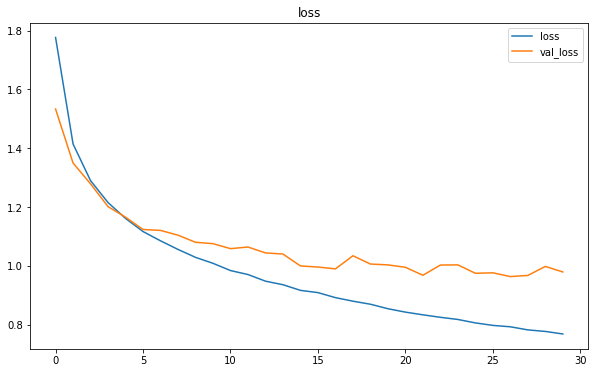

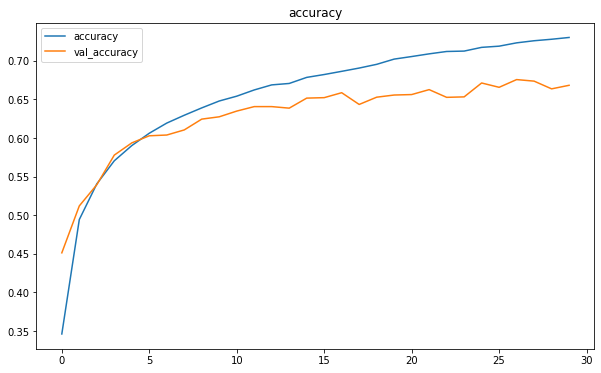

In [14]:
# MODEL 1
# model = keras.models.Sequential([
#     keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
#     keras.layers.MaxPool2D(pool_size=[2,2]),
#     keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu'),
#     keras.layers.MaxPool2D(pool_size=(2,2)),
#     keras.layers.Conv2D(filters=10, kernel_size=[2,2], activation='relu'),
#     keras.layers.Flatten(),
#     keras.layers.Dense(10, activation="softmax")
#   ])


# MODEL 2
# model = keras.models.Sequential([
#     keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='tanh', input_shape=[32, 32,3]),
#     keras.layers.MaxPool2D(pool_size=[2,2]),
#     keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='tanh'),
#     keras.layers.MaxPool2D(pool_size=(2,2)),
#     keras.layers.Conv2D(filters=32, kernel_size=[2,2], activation='tanh'),
#     keras.layers.Flatten(),
#     keras.layers.Dense(10, activation="softmax")
#   ])


# MODEL 3
# model = keras.models.Sequential([
#     keras.layers.Conv2D(filters=32, kernel_size=[5,5], activation='relu', input_shape=[32, 32,3]),
#     keras.layers.Conv2D(filters=16, kernel_size=[3,3], activation='relu'),
#     keras.layers.Conv2D(filters=16, kernel_size=[2,2], activation='relu'),
#     keras.layers.MaxPool2D(pool_size=(3,3)),
#     keras.layers.Flatten(),
#     keras.layers.Dense(10, activation="softmax")
#   ])


# MODEL 4
# model = keras.models.Sequential([
#     keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
#     keras.layers.AveragePooling2D(pool_size=[2,2]),
#     keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu'),
#     keras.layers.AveragePooling2D(pool_size=[2,2]),
#     keras.layers.Conv2D(filters=32, kernel_size=[2,2], activation='relu'),
#     keras.layers.AveragePooling2D(pool_size=[2,2]),
#     keras.layers.Flatten(),
#     keras.layers.Dense(10, activation="softmax")
#   ])


# MODEL 5
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu', input_shape=[32, 32,3]),
    keras.layers.MaxPool2D(pool_size=[2,2]),
    keras.layers.Conv2D(filters=32, kernel_size=[3,3], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=32, kernel_size=[2,2], activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=32, kernel_size=[2,2], activation='relu'),    
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation="softmax")
  ])



model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",              
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30, batch_size=128,
                  validation_data=(X_valid, y_valid))

plot_loss(history)
plot_accuracy(history)

scores = model.evaluate(X_test, y_test, verbose=2)
print(" %s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("----------------------------")